<a href="https://colab.research.google.com/github/SumaiyaRahman/Data-Structure-Assignment/blob/master/thesis_4_2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/SumaiyaRahman/thesis/main/diabetes_data_bd.csv')
dataset2= pd.read_csv('https://raw.githubusercontent.com/SumaiyaRahman/thesis/main/diabetes_data_bd.csv')
dataset.shape

(520, 17)

In [ ]:
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
dataset.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [ ]:
dataset.describe(include = np.object).transpose()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,count,unique,top,freq
Gender,520,2,Male,328
Polyuria,520,2,No,262
Polydipsia,520,2,No,287
sudden weight loss,520,2,No,303
weakness,520,2,Yes,305
Polyphagia,520,2,No,283
Genital thrush,520,2,No,404
visual blurring,520,2,No,287
Itching,520,2,No,267
Irritability,520,2,No,394


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = dataset.columns
col = columns[1:]
for i in col:
    dataset[i] = le.fit_transform(dataset[i])


le2 = LabelEncoder()
columns2 = dataset2.columns
col2 = columns2[1:]
for i in col2:
    dataset2[i] = le2.fit_transform(dataset2[i])

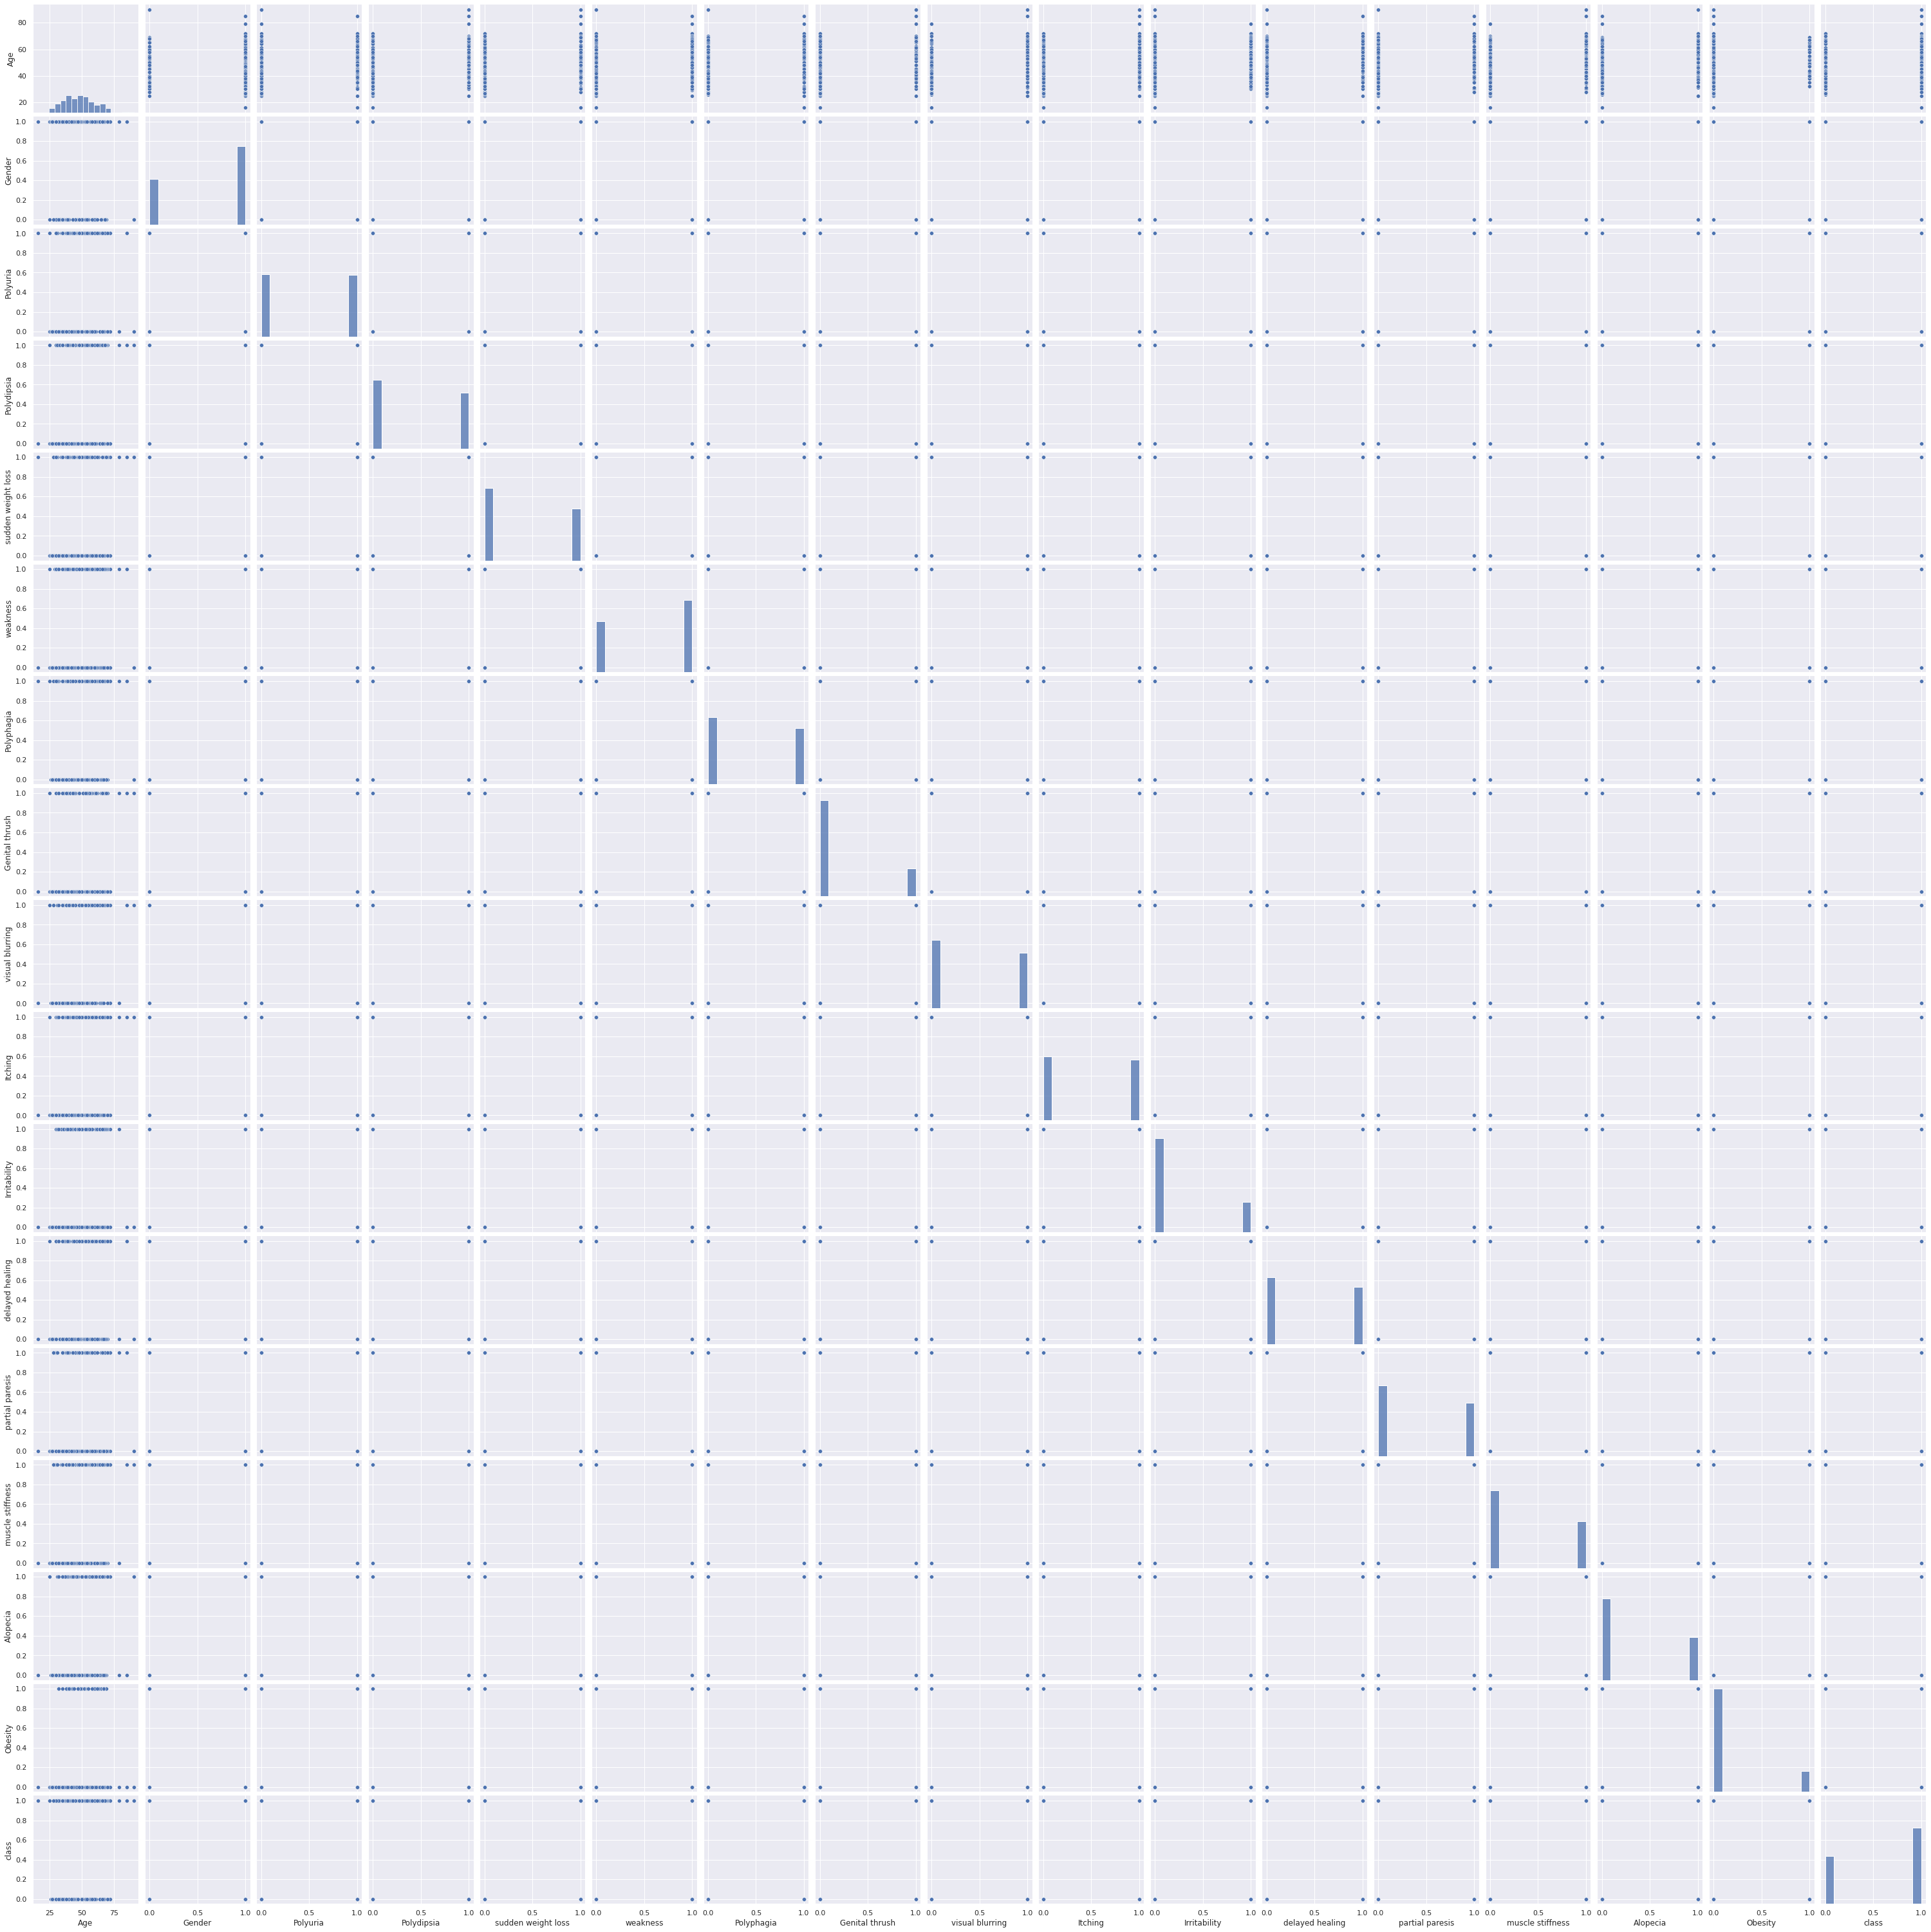

In [ ]:
sns.pairplot(dataset2)


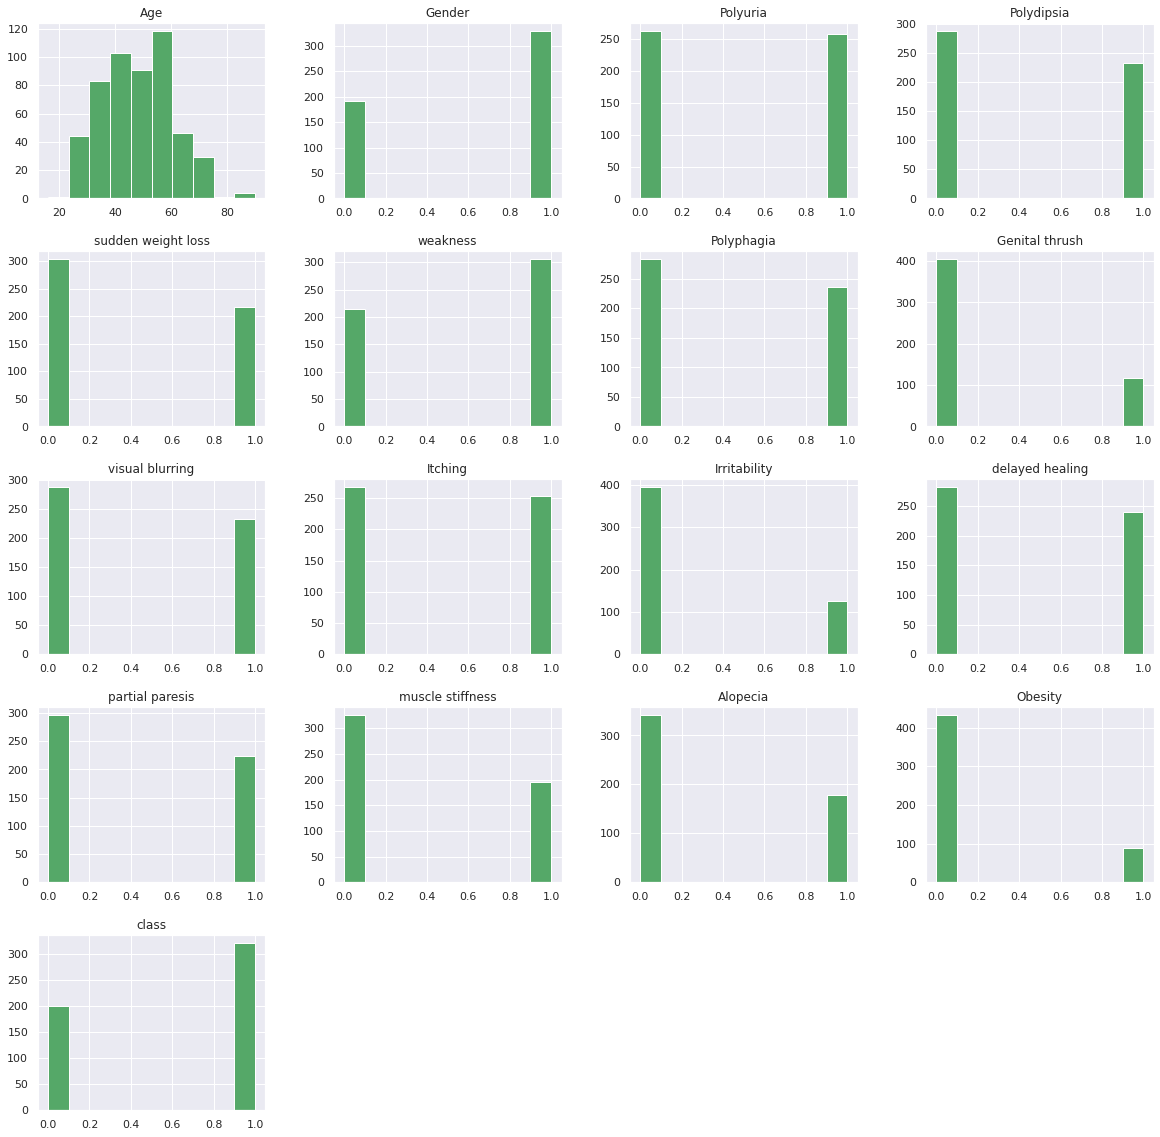

In [ ]:
p=dataset.hist(figsize=(20,20),color='g')

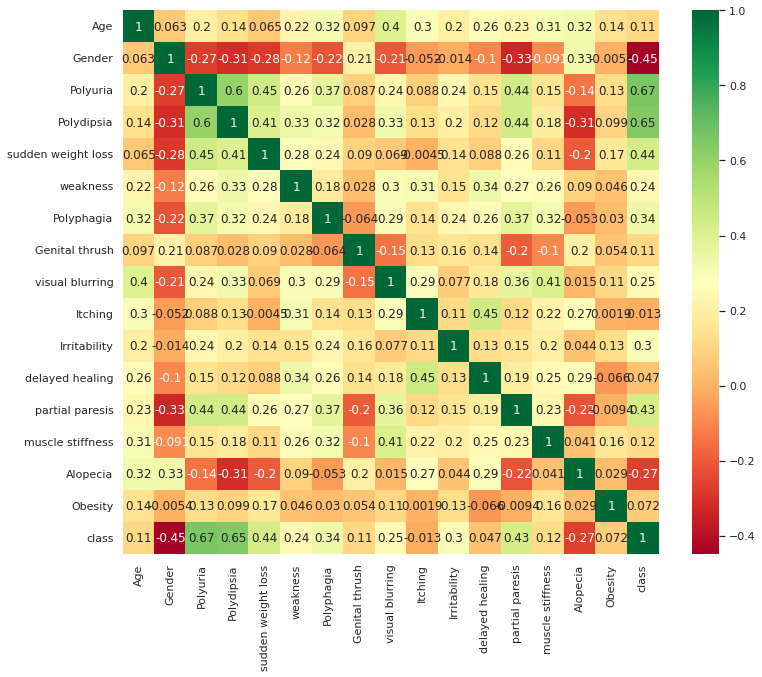

In [ ]:
plt.figure(figsize=(12,10))
p = sns.heatmap(dataset.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
X = dataset.iloc[:, 0:-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
X2 = dataset2.iloc[:, 0:16]
y2 = dataset2.iloc[:, 16]
#X2=X
sc = StandardScaler()
X2['Age'] = sc.fit_transform(X2[['Age']])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, random_state=0, test_size=0.2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 8)
X_train1 = pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)

In [ ]:
#feature extraction
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X = dataset.iloc[:, 0:-1]
y = dataset.iloc[:, -1]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, random_state=0, test_size=0.2)
lda = LDA(n_components=1)
X_train3 = lda.fit_transform(X_train3, y_train3)
X_test3 = lda.transform(X_test3)

In [ ]:
#Univariate Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X = dataset2.iloc[:, 0:16]
y = dataset2.iloc[:, 16]
uni = SelectKBest(score_func = f_classif, k = 6)
fit = uni.fit(X, y)

X.columns[fit.get_support(indices=True)].tolist()

['Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'Polyphagia',
 'partial paresis']

In [ ]:
#feature selection
dataset3 = dataset[['Gender','Polyuria','Polydipsia', 'sudden weight loss','Polyphagia','partial paresis','class']]
train2,test2=train_test_split(dataset3,test_size=0.2,random_state=0)
X_train2=train2[train2.columns[:-1]]
X_test2=test2[test2.columns[:-1]]
y_train2=train2['class']
y_test2=test2['class']

Optimal number of features : 10
Best features: ['Gender' 'Polyuria' 'Polydipsia' 'Polyphagia' 'Itching' 'Irritability'
 'delayed healing' 'partial paresis' 'muscle stiffness' 'Alopecia']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


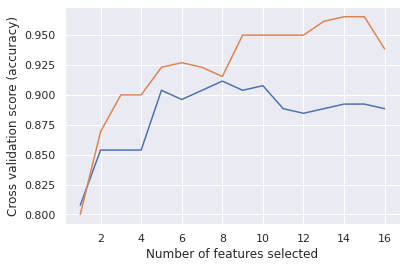

In [ ]:
#feature selection: Recursive Feature Elimination
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

svc = SVC(kernel="linear")

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)
print(f"Best features: {rfecv.get_feature_names_out(input_features=None)}")

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

dataset4 = dataset[rfecv.get_feature_names_out(input_features=None)]
X_train4,X_test4=train_test_split(dataset4,test_size=0.2,random_state=0)
y_train4=y_train
y_test4=y_test

In [ ]:
X_train5,X_test5=train_test_split(dataset4,test_size=0.2,random_state=0)
y_train5=y_train
y_test5=y_test
lda = LDA(n_components=1)
X_train5 = lda.fit_transform(X_train5, y_train5)
X_test5 = lda.transform(X_test5)

{'1': 0.9307692307692308, '2': 0.9057692307692309, '3': 0.9173076923076924, '4': 0.8673076923076923, '5': 0.876923076923077, '6': 0.8423076923076923, '7': 0.85, '8': 0.8153846153846154, '9': 0.8192307692307693, '10': 0.801923076923077, '11': 0.8038461538461539, '12': 0.7961538461538462, '13': 0.8038461538461539, '14': 0.7865384615384615, '15': 0.7788461538461539, '16': 0.7653846153846154, '17': 0.7826923076923078, '18': 0.773076923076923, '19': 0.7769230769230768, '20': 0.7634615384615385}


Text(0, 0.5, 'Cross-validation accuracy')

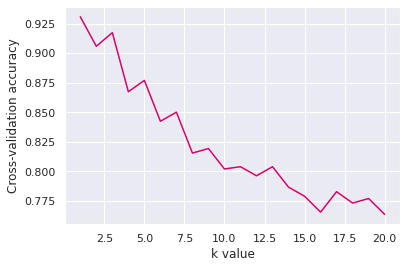

In [ ]:
#Optimum value of k
high_k=21

k_scores = []
k_scores_dict={}
for k in range(1,high_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score (knn, X, y, scoring = 'accuracy')
    k_scores.append(scores.mean())
    k_scores_dict[str(k)]=scores.mean()

#Visualise best k number
print(k_scores_dict)
plt.plot(range(1,high_k),k_scores,color='xkcd:dark hot pink')
plt.xlabel ('k value')
plt.ylabel('Cross-validation accuracy')

In [ ]:
#KNN

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"KNN accuracy: {accuracy_score(y_test, y_pred)}")

knn2 = KNeighborsClassifier(n_neighbors=3)
knn2.fit(X_train1, y_train1)

y_pred1 = knn2.predict(X_test1)
print(f"KNN accuracy with PCA: {accuracy_score(y_test1, y_pred1)}")

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train2, y_train2)

y_pred2 = knn3.predict(X_test2)
print(f"KNN accuracy with feature: {accuracy_score(y_test2, y_pred2)}")

KNN accuracy: 0.8846153846153846
KNN accuracy with PCA: 0.9615384615384616
KNN accuracy with feature: 0.8846153846153846


In [ ]:
#SVM

#SVM linear kernel
svc_model_4=SVC(kernel='linear',C=.5)
svc_model_4.fit(X_train,y_train)
svc_acc_test_4=accuracy_score(y_test,svc_model_4.predict(X_test))
print(f"SVM accuracy with linear kernel: {svc_acc_test_4}")
#SVM RBf kernel
svc_model_5 = SVC(random_state=0, kernel='rbf')
svc_model_5.fit(X_train, y_train)
svc_acc_test_5=accuracy_score(y_test,svc_model_5.predict(X_test))
print(f"SVM accuracy with rbf kernel: {svc_acc_test_5}")
#SVM polyomial kernel
svc_model_6=SVC(kernel='poly')
svc_model_6.fit(X_train,y_train)
svc_acc_test_6=accuracy_score(y_test,svc_model_6.predict(X_test))
print(f"SVM accuracy with polinomial kernel: {svc_acc_test_6}")
print()


#SVM linear kernel with PCA
svc_model_1=SVC(kernel='linear',C=.5)
svc_model_1.fit(X_train1,y_train1)
svc_acc_test_1=accuracy_score(y_test1,svc_model_1.predict(X_test1))
print(f"SVM accuracy with linear kernel(PCA): {svc_acc_test_1}")
#SVM RBf kernel
svc_model_2 = SVC(random_state=0, kernel='rbf')
svc_model_2.fit(X_train1, y_train1)
svc_acc_test_2=accuracy_score(y_test1,svc_model_2.predict(X_test1))
print(f"SVM accuracy with rbf kernel(PCA): {svc_acc_test_2}")
#SVM polyomial kernel
svc_model_3=SVC(kernel='poly')
svc_model_3.fit(X_train1,y_train1)
svc_acc_test_3=accuracy_score(y_test1,svc_model_3.predict(X_test1))
print(f"SVM accuracy with polinomial kernel(PCA): {svc_acc_test_3}")
print()


#SVM linear kernel feature selected
svc_model_7=SVC(kernel='linear',C=.5)
svc_model_7.fit(X_train2,y_train2)
svc_acc_test_7=accuracy_score(y_test2,svc_model_7.predict(X_test2))
print(f"SVM accuracy with linear kernel(feature): {svc_acc_test_7}")
#SVM RBf kernel
svc_model_8 = SVC(random_state=0, kernel='rbf')
svc_model_8.fit(X_train2, y_train2)
svc_acc_test_8=accuracy_score(y_test2,svc_model_8.predict(X_test2))
print(f"SVM accuracy with rbf kernel: {svc_acc_test_8}")
#SVM polyomial kernel
svc_model_9=SVC(kernel='poly')
svc_model_9.fit(X_train2,y_train2)
svc_acc_test_9=accuracy_score(y_test2,svc_model_9.predict(X_test2))
print(f"SVM accuracy with polinomial kernel: {svc_acc_test_9}")

SVM accuracy with linear kernel: 0.9423076923076923
SVM accuracy with rbf kernel: 0.6153846153846154
SVM accuracy with polinomial kernel: 0.6153846153846154

SVM accuracy with linear kernel(PCA): 0.9038461538461539
SVM accuracy with rbf kernel(PCA): 0.9519230769230769
SVM accuracy with polinomial kernel(PCA): 0.9519230769230769

SVM accuracy with linear kernel(feature): 0.9326923076923077
SVM accuracy with rbf kernel: 0.9519230769230769
SVM accuracy with polinomial kernel: 0.9519230769230769


In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)
y_pred = nbModel.predict(X_test)
print(f"Naive Bayas accuracy: {accuracy_score(y_test,y_pred)}")

nbModel = GaussianNB()
nbModel.fit(X_train1, y_train1)
y_pred = nbModel.predict(X_test1)
print(f"Naive Bayas accuracy (PCA): {accuracy_score(y_test1,y_pred)}")


nbModel = GaussianNB()
nbModel.fit(X_train2, y_train2)
y_pred2 = nbModel.predict(X_test2)
print(f"Naive Bayas accuracy (feature): {accuracy_score(y_test2,y_pred2)}")

Naive Bayas accuracy: 0.9326923076923077
Naive Bayas accuracy (PCA): 0.9230769230769231
Naive Bayas accuracy (feature): 0.9326923076923077


In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

decision_tree2 = DecisionTreeClassifier()
decision_tree2.fit(X_train, y_train)
y_pred = decision_tree2.predict(X_test)
print(f"Decision tree accuracy: {accuracy_score(y_test,y_pred)}")

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train1, y_train1)
y_pred = decision_tree.predict(X_test1)
print(f"Decision tree accuracy(PCA): {accuracy_score(y_test1,y_pred)}")


decision_tree3 = DecisionTreeClassifier()
decision_tree3.fit(X_train2, y_train2)
y_pred2 = decision_tree3.predict(X_test2)
print(f"Decision tree accuracy (feature): {accuracy_score(y_test2,y_pred2)}")

Decision tree accuracy: 0.9711538461538461
Decision tree accuracy(PCA): 0.9711538461538461
Decision tree accuracy (feature): 0.9423076923076923


In [ ]:
#Random forest

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(f"Random forest accuracy: {accuracy_score(y_test,y_pred)}")


random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train1, y_train1)
y_pred = random_forest.predict(X_test1)
print(f"Random forest accuracy(PCA): {accuracy_score(y_test1,y_pred)}")

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train2, y_train2)
y_pred = random_forest.predict(X_test2)
print(f"Random forest accuracy(feature): {accuracy_score(y_test2,y_pred)}")

Random forest accuracy: 0.9903846153846154
Random forest accuracy(PCA): 0.9807692307692307
Random forest accuracy(feature): 0.9903846153846154


In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_model_test=accuracy_score(y_test,log_model.predict(X_test))
print(f"Logistic regression accuracy: {log_model_test}")

log_model = LogisticRegression()
log_model.fit(X_train1, y_train1)
log_model_test=accuracy_score(y_test1,log_model.predict(X_test1))
print(f"Logistic regression accuracy (PCA): {log_model_test}")

log_model = LogisticRegression()
log_model.fit(X_train2, y_train2)
log_model_test=accuracy_score(y_test2,log_model.predict(X_test2))
print(f"Logistic regression accuracy (feature): {log_model_test}")

Logistic regression accuracy: 0.9519230769230769
Logistic regression accuracy (PCA): 0.9134615384615384
Logistic regression accuracy (feature): 0.9519230769230769


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()

classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(X_train, y_train, batch_size = 10, epochs = 180)

Epoch 1/180
42/42 [==============================] - 1s 2ms/step - loss: 0.6911 - accuracy: 0.5769
Epoch 2/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.6154
Epoch 3/180
42/42 [==============================] - 0s 1ms/step - loss: 0.6642 - accuracy: 0.6154
Epoch 4/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6534 - accuracy: 0.6154
Epoch 5/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.6154
Epoch 6/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6436 - accuracy: 0.6154
Epoch 7/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6154
Epoch 8/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6330 - accuracy: 0.6154
Epoch 9/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.6154
Epoch 10/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6139 - accuracy: 0.6154
Epoch 11/

In [ ]:
y_pred_test = classifier.predict(X_test)
y_pred_test=y_pred_test>0.5

y_pred_train = classifier.predict(X_train)
y_pred_train=y_pred_train>0.5

print("Accuracy on Train Set ==> ",accuracy_score(y_train,y_pred_train))
print("Accuracy on Test Set ==> ",accuracy_score(y_test,y_pred_test))

13/13 [==============================] - 0s 1ms/step
Accuracy on Train Set ==>  0.9591346153846154
Accuracy on Test Set ==>  0.9711538461538461


In [ ]:
#ANN with PCA

classifier1 = Sequential()

classifier1.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier1.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier1.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier1.fit(X_train1, y_train1, batch_size = 10, epochs = 180)

Epoch 1/180
42/42 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5889
Epoch 2/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.6154
Epoch 3/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6154
Epoch 4/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6462 - accuracy: 0.6154
Epoch 5/180
42/42 [==============================] - 0s 2ms/step - loss: 0.5958 - accuracy: 0.6154
Epoch 6/180
42/42 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.6154
Epoch 7/180
42/42 [==============================] - 0s 2ms/step - loss: 0.4854 - accuracy: 0.6154
Epoch 8/180
42/42 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.6154
Epoch 9/180
42/42 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.6154
Epoch 10/180
42/42 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.6154
Epoch 11/

In [ ]:
y_pred_test1 = classifier1.predict(X_test1)
y_pred_test1=y_pred_test1>0.5

y_pred_train1 = classifier1.predict(X_train1)
y_pred_train1=y_pred_train1>0.5

print("Accuracy on Train Set (PCA)==> ",accuracy_score(y_train1,y_pred_train1))
print("Accuracy on Test Set (PCA)==> ",accuracy_score(y_test1,y_pred_test1))

13/13 [==============================] - 0s 2ms/step
Accuracy on Train Set (PCA)==>  0.9759615384615384
Accuracy on Test Set (PCA)==>  0.9903846153846154


In [ ]:
#ANN with feature

classifier2 = Sequential()

classifier2.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier2.add(Dense(units= 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier2.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier2.fit(X_train2, y_train2, batch_size = 10, epochs = 180)

Epoch 1/180
42/42 [==============================] - 0s 1ms/step - loss: 0.6913 - accuracy: 0.6010
Epoch 2/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6838 - accuracy: 0.6154
Epoch 3/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6154
Epoch 4/180
42/42 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.6154
Epoch 5/180
42/42 [==============================] - 0s 1ms/step - loss: 0.6254 - accuracy: 0.6154
Epoch 6/180
42/42 [==============================] - 0s 1ms/step - loss: 0.5990 - accuracy: 0.6154
Epoch 7/180
42/42 [==============================] - 0s 1ms/step - loss: 0.5627 - accuracy: 0.6154
Epoch 8/180
42/42 [==============================] - 0s 1ms/step - loss: 0.5262 - accuracy: 0.6154
Epoch 9/180
42/42 [==============================] - 0s 2ms/step - loss: 0.4971 - accuracy: 0.6154
Epoch 10/180
42/42 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.6154
Epoch 11/

In [ ]:
y_pred_test2 = classifier2.predict(X_test2)
y_pred_test2=y_pred_test2>0.5

y_pred_train2 = classifier2.predict(X_train2)
y_pred_train2=y_pred_train2>0.5

print("Accuracy on Train Set (feature) ==> ",accuracy_score(y_train2,y_pred_train2))
print("Accuracy on Test Set (feature) ==> ",accuracy_score(y_test2,y_pred_test2))

13/13 [==============================] - 0s 1ms/step
Accuracy on Train Set (feature) ==>  0.9230769230769231
Accuracy on Test Set (feature) ==>  0.9326923076923077


In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Reshape, Conv2DTranspose, BatchNormalization, Activation, Conv2D, Flatten, Conv1D, GlobalMaxPooling1D, Conv3D, GlobalMaxPooling3D, LSTM, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras_preprocessing import sequence
from sklearn.metrics import classification_report, confusion_matrix


dataset3 = dataset[['Age','Gender',	'Polyuria',	'Polydipsia',	'sudden weight loss',	'weakness',	'Polyphagia','visual blurring',	'Itching',	'Irritability',	'delayed healing',	'partial paresis','muscle stiffness',	'Alopecia',	'Obesity',	'class']]
train,test=train_test_split(dataset3,test_size=0.2,random_state=0)
X_train=train[train.columns[:-1]]
X_test=test[test.columns[:-1]]
y_train=train['class']
y_test=test['class']

X_train = np.column_stack((X_train, np.zeros((len(X_train),1))))
X_test = np.column_stack((X_test, np.zeros((len(X_test),1))))

# reshape input data to be able do extract feature.
# reshape for CNN (instance, row, column, channel)
X_train = X_train.reshape(len(X_train),4,4,1)
X_test = X_test.reshape(len(X_test),4,4,1)
# convert output class to category
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# define the keras model
model = Sequential()

model.add(Conv2D(64, 2, activation='relu', input_shape=(4,4,1)))
model.add(MaxPooling2D(pool_size=1))
model.add(Conv2D(32, 2, activation='relu'))
model.add(MaxPooling2D(pool_size=1))
model.add(Flatten())
model.add(Dense(100, input_dim=8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
# summarize of model
#print(model.summary())

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=200)

# evaluate the model
scores = model.evaluate(X_train, y_train, verbose=0)
print()
print('====================')
#print('Result of training set')
#print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
print('====================')

# predict using test_set
value = model.predict(X_test)
y_pred = np.argmax(value,axis=1)
y_true = np.argmax(y_test,axis=1)

result_CF_matrix = confusion_matrix(y_true, y_pred, labels=[0,1])
TP = result_CF_matrix[0,0]
FN = result_CF_matrix[0,1]
FP = result_CF_matrix[1,0]
TN = result_CF_matrix[1,1]

Epoch 1/200
13/13 [==============================] - 1s 3ms/step - loss: 0.7121 - accuracy: 0.5865
Epoch 2/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6523 - accuracy: 0.6082
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.5970 - accuracy: 0.6635
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 0.5356 - accuracy: 0.7476
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.4686 - accuracy: 0.7933
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 0.3898 - accuracy: 0.8462
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 0.3504 - accuracy: 0.8582
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 0.3065 - accuracy: 0.8846
Epoch 9/200
13/13 [==============================] - 0s 4ms/step - loss: 0.2411 - accuracy: 0.9087
Epoch 10/200
13/13 [==============================] - 0s 3ms/step - loss: 0.2279 - accuracy: 0.9135
Epoch 11/

In [ ]:
ACC = (TP + TN)/(TP+FN+FP+TN)

print('Result of testing set')
print('Accuracy = ',(ACC*100))

Result of testing set
Accuracy =  99.03846153846155
